##  Улучшение модели 

1. использование дополнительных признаков при аггрегации данных, помимо mean, а именно:

    1. mean
    2. standard deviation
    3. average absolute deviation
    4. minimum value
    5. maximum value
    6. difference of maximum and minimum values
    7. median
    8. median absolute deviation
    9. interquartile range
    10. negative values count
    11. positive values count
    12. number of values above mean
    13. number of peaks
    14. skewness
    15. kurtosis
    16. energy
    17. average resultant acceleration
    18. signal magnitude area
    
2. Использование Fast-Fourier transform (FFT)
3. Использование index capturing

2. Вариация размера moving window (в нашем случае усреднение всех параметров происходит по 2 окнам)


3. Использовать другие подходы при решении задачи:
    1) традиционные методы решения временных рядов
        - ARIMA
        - Prophet
        - Neural Prophet
        - Vector autoregression
    2) ML aproaches
        - RNN
        - any regressor
       
4. Использовать подходы, описанные здесь: 
- https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
- https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
- https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0
- https://machinelearningmastery.com/time-series-forecasting-supervised-learning/

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

pd.options.display.max_columns=100
import warnings
warnings.filterwarnings('ignore')

In [2]:
table = pd.read_csv('contest_train_df.csv')
test = pd.read_csv('contest_test_df.csv')
table2 = pd.read_csv('well_works_df.csv')
example = pd.read_csv('submit_sample.csv')

##### train set

In [3]:
# Delete Nans
table = table.dropna(axis=0)
# trasforming data to datetime
table['Start_date'] = pd.to_datetime(table.dropna(axis=0).Start_date)
table['Date'] = pd.to_datetime(table.dropna(axis=0).Date)
# now arrange data in ascending order of the user and timestamp
table = table.sort_values(by = ['Well_ID', 'Start_date'], ignore_index=True)

# # Добавим данные с table2 в table
# table2 = table2.drop(['Date_VNR'], axis=1)
# table2['Start_date'] = pd.to_datetime(table2.Start_date)
# table = table.merge(table2, on=['Well_ID','Start_date'])


In [80]:
# # Добавим данные с table2 в table
# table2 = table2.drop(['Date_VNR'], axis=1)
# table2['Start_date'] = pd.to_datetime(table2.Start_date)
# tets_hue = test.merge(table2, on=['Well_ID','Start_date'])
# tets_hue

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,GTM_type_lbl
0,130.6,NaN,NaN,300.0,12.4,2272.0,NaN,400.0,73.000000,2353.0,116.0,2444.0,4.0000,0.876,2.91,7.4,NaN,1.012,94.0,51.516129,50.451613,60.290323,26.483871,NaN,1,0,1.0,25,1656.0,1980-10-22,1981-04-11,1,6,0,7
1,130.6,NaN,NaN,300.0,12.4,2272.0,NaN,400.0,73.000000,2353.0,116.0,2444.0,4.0000,0.876,2.91,7.4,NaN,1.012,94.0,51.516129,50.451613,60.290323,26.483871,NaN,1,0,1.0,25,1656.0,1980-10-23,1981-04-11,1,6,0,7
2,130.6,NaN,297.0,300.0,12.4,2272.0,90.0,400.0,73.000000,2353.0,116.0,2444.0,4.0000,0.876,2.91,7.4,NaN,1.012,94.0,51.516129,50.451613,60.290323,26.483871,NaN,1,0,1.0,25,1656.0,1980-10-24,1981-04-11,1,6,0,7
3,130.6,NaN,NaN,300.0,12.4,2272.0,NaN,400.0,73.000000,2353.0,116.0,2444.0,4.0000,0.876,2.91,7.4,NaN,1.012,94.0,51.516129,50.451613,60.290323,26.483871,NaN,1,0,1.0,25,1656.0,1980-10-25,1981-04-11,1,6,0,7
4,130.6,NaN,NaN,300.0,12.4,2272.0,NaN,400.0,73.000000,2353.0,116.0,2444.0,4.0000,0.876,2.91,7.4,NaN,1.012,94.0,51.516129,50.451613,60.290323,26.483871,NaN,1,0,1.0,25,1656.0,1980-10-26,1981-04-11,1,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431632,129.0,NaN,0.0,50.0,8.0,2299.0,NaN,35.0,66.020784,2550.0,167.0,2729.0,306.6685,0.849,1.10,8.6,NaN,1.008,130.0,219.225806,167.935484,252.290323,78.129032,NaN,0,1,1.0,38,33.0,1981-01-29,1981-01-18,8668,59937,0,2
431633,129.0,NaN,0.0,50.0,8.0,2299.0,NaN,35.0,66.020784,2550.0,167.0,2729.0,306.6685,0.849,1.10,8.6,NaN,1.008,130.0,219.225806,167.935484,252.290323,78.129032,NaN,0,1,1.0,38,33.0,1981-01-30,1981-01-18,8668,59937,0,2
431634,129.0,NaN,0.0,50.0,8.0,2299.0,NaN,35.0,66.020784,2550.0,167.0,2729.0,306.6685,0.849,1.10,8.6,NaN,1.008,130.0,219.225806,167.935484,252.290323,78.129032,NaN,0,1,1.0,38,33.0,1981-01-31,1981-01-18,8668,59937,0,2
431635,129.0,NaN,0.0,50.0,8.0,2299.0,NaN,35.0,66.020784,2550.0,167.0,2729.0,306.6685,0.849,1.10,8.6,NaN,1.008,130.0,219.225806,167.935484,252.290323,78.129032,NaN,0,1,1.0,38,33.0,1981-02-01,1981-01-18,8668,59937,0,2


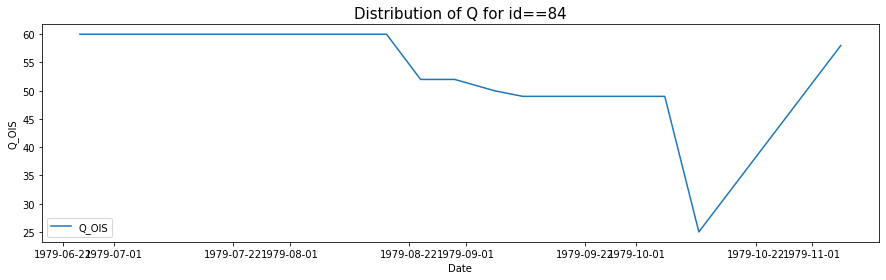

In [4]:
# Значение дебита для скважины с id=84
table.loc[table.id==84]
plt.figure(figsize = (15, 4))
sns.lineplot(y = 'Q_OIS', x = 'Date', data = table.loc[table.id==84])
plt.legend(['Q_OIS'])
# plt.ylabel(i)
plt.title('Distribution of Q for id==84', fontsize = 15)
plt.show()

In [5]:
table.loc[table.Well_ID<1000]

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,GTM_type_lbl
0,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.860150,60.033333,138.063158,219.447761,57.410000,1,0,1.0,48,501.0,1979-06-25,1979-10-17,17,84,0,7
1,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.860150,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-02,1979-10-17,17,84,0,7
2,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.860150,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-09,1979-10-17,17,84,0,7
3,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.860150,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-14,1979-10-17,17,84,0,7
4,129.0,2762.0,60.0,90.0,16.0,2414.0,88.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,13.4,1.011,115.7,457.600000,57.774194,86.483871,156.800000,54.936193,1,0,1.0,48,501.0,1979-08-18,1979-10-17,17,84,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,130.6,2070.0,0.0,273.0,8.0,1892.0,95.0,590.0,76.692308,2600.0,165.0,2779.0,296.159,0.866,1.85,12.4,26.0,1.010,82.4,740.466667,983.900000,743.733333,858.700000,79.910000,0,0,1.0,42,1101.0,1979-05-05,1979-05-21,995,5556,0,7
920,130.6,2070.0,394.0,273.0,8.0,1892.0,95.0,590.0,76.692308,2600.0,165.0,2779.0,296.159,0.866,1.85,12.4,26.0,1.010,82.4,740.466667,983.900000,743.733333,858.700000,81.175220,1,0,1.0,42,1101.0,1979-05-09,1979-05-21,995,5556,0,7
921,130.6,2070.0,394.0,273.0,8.0,1892.0,95.0,590.0,76.692308,2600.0,165.0,2779.0,296.159,0.866,1.85,12.4,26.0,1.010,82.4,567.161290,959.516129,758.225806,868.032258,81.175220,1,0,1.0,42,1101.0,1979-05-19,1979-05-21,995,5556,0,7
922,130.6,1902.0,347.0,273.0,8.0,1892.0,95.0,590.0,76.692308,2600.0,165.0,2779.0,296.159,0.866,1.85,12.4,26.0,1.010,82.4,567.161290,959.516129,758.225806,868.032258,89.910000,1,0,1.0,42,1101.0,1979-05-20,1979-05-21,995,5556,0,7


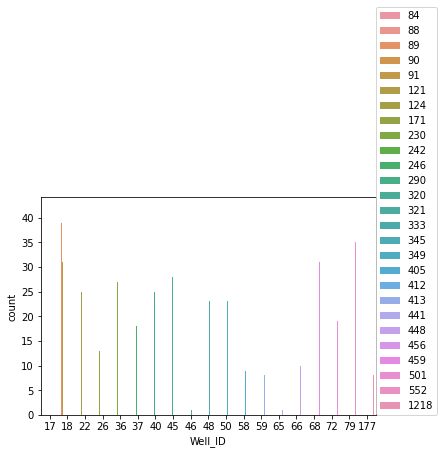

In [6]:
# Распределение количества дат для скважин
sns.countplot(x = 'Well_ID', hue = 'id', data = table.loc[table.Well_ID<200])
plt.legend(loc=(1,0))


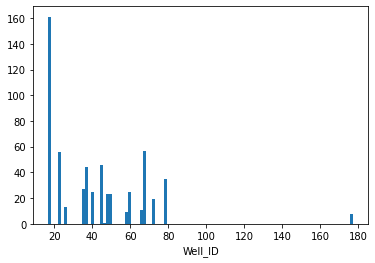

In [7]:
# кол-во данных для скважин
plt.hist(table.loc[table.Well_ID<200].Well_ID, bins=100)
plt.xlabel('Well_ID')
plt.show()

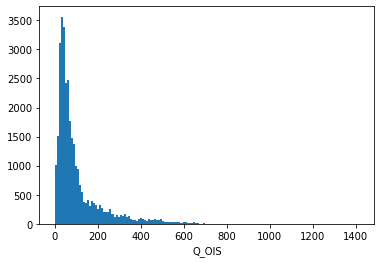

In [8]:
# Распределение Дебита
plt.hist(table.Q_OIS, bins=150)
plt.xlabel('Q_OIS')
plt.show()

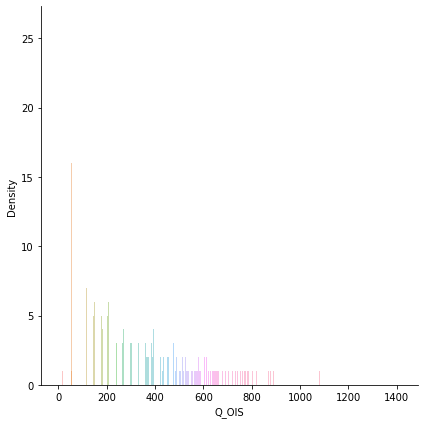

In [9]:
sns.FacetGrid(table, hue = 'Q_OIS', size = 6).map(sns.distplot, 'Q_OIS')
# plt.legend().remove()
plt.show()

##### test set

In [10]:
# trasforming data to datetime
test['Start_date'] = pd.to_datetime(test.Start_date)
test['Date'] = pd.to_datetime(test.Date)
# now arrange data in ascending order of the user and timestamp
test = test.sort_values(by = ['Well_ID', 'Start_date'], ignore_index=True)

### Реализация moving window для аггрегации признаков

In [784]:
from IPython.display import Image
Image(url= "structure.jpg", width=800, height=800)

In [11]:
#посчитаем сколько минимальное количество дат у скважины до начала одного ГТМ

def min_count(table):
    count1 = {}
    for i in table.id.unique():
#     s = table.set_index('id').loc[i].shape[0] - table.set_index('id').loc[i].VNR.sum()
        s = np.array([table.set_index('id').loc[i,'VNR']]).reshape(-1).shape[0] - table.set_index('id').loc[i].VNR.sum()
        count1[i]=s
    
    d = {'id':pd.Series(count1.keys()), 'count': pd.Series(count1.values())}
    new = pd.DataFrame(d) 
    merged = table.merge(new, on='id')
# merged.loc[merged.id==405]
    return merged

#удалим из выборки скважины которые не вышли на режим ВООБЩЕ
def delete_no_VNR(merged):
    for i in merged.id.unique():
        s = merged.loc[merged.id==i].VNR.sum()
        if s<1:
            merged = merged.set_index('id').drop(i).reset_index()
    return merged

# Далее сделаем саггрегируем данные с помощью moving_window размером 2
def aggregation(merged2):
#добавим префикс к именам
    append_str_2 = '_2'
    append_str_1 = '_1'

    final_dt = pd.DataFrame()

    for i in merged2.id.unique():
        step = merged2.set_index('id').loc[i]['count'].iloc[0]
        delet = ['id', 'count', 'State']

        if step%2 == 0:

            first = merged2.loc[merged2.id==i].iloc[0:step//2].drop(delet, axis=1)
            second = merged2.loc[merged2.id==i].iloc[step//2:step].drop(delet, axis=1)

        elif step%2 != 0:

            first = merged2.loc[merged2.id==i].iloc[0:step//2+1].drop(delet, axis=1)
            second = merged2.loc[merged2.id==i].iloc[step//2:step].drop(delet, axis=1)

    #     columns = merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1).columns

        second.columns = [sub + append_str_2 for sub in second.columns]
        first.columns = [sub + append_str_1 for sub in first.columns]

        gener = merged2.loc[merged2.id==i].iloc[step]
    #     het
        interm = pd.DataFrame(pd.concat([first.mean(axis=0), second.mean(axis=0), gener])).T
        final_dt = final_dt.append(interm, ignore_index=True)
    return final_dt

In [12]:
merged_test = min_count(test)

In [13]:
merged_test = pd.concat([merged_test.drop('Q_OIS', axis=1), merged_test.Q_OIS], axis=1) 
final_dt_test = aggregation(merged_test)

In [15]:
merged = min_count(table)
merged

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,GTM_type_lbl,count
0,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.410000,1,0,1.0,48,501.0,1979-06-25,1979-10-17,17,84,0,7,14
1,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-02,1979-10-17,17,84,0,7,14
2,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-09,1979-10-17,17,84,0,7,14
3,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-14,1979-10-17,17,84,0,7,14
4,129.0,2762.0,60.0,90.0,16.0,2414.0,88.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,13.4,1.011,115.7,457.60000,57.774194,86.483871,156.800000,54.936193,1,0,1.0,48,501.0,1979-08-18,1979-10-17,17,84,0,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,129.0,1569.0,51.0,56.0,8.0,2295.0,87.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,11.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,80.240000,1,0,1.0,38,389.0,1979-03-24,1979-04-13,8687,60064,0,7,16
32562,129.0,670.0,22.0,56.0,8.0,2295.0,92.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.7,1.008,130.0,638.96679,247.096774,106.645161,484.806452,140.137447,1,0,1.0,38,389.0,1979-04-03,1979-04-13,8687,60064,0,7,16
32563,129.0,655.0,22.0,56.0,8.0,2295.0,92.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,147.530000,1,0,1.0,38,389.0,1979-04-06,1979-04-13,8687,60064,0,7,16
32564,129.0,265.0,0.0,56.0,8.0,2295.0,86.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,174.440000,0,0,1.0,38,389.0,1979-04-13,1979-04-13,8687,60064,0,7,16


In [343]:
# #посчитаем сколько минимальное количество дат у скважины до начала одного ГТМ

# count1 = {}
# for i in table.id.unique():
# #     s = table.set_index('id').loc[i].shape[0] - table.set_index('id').loc[i].VNR.sum()
#     s = np.array([table.set_index('id').loc[i,'VNR']]).reshape(-1).shape[0] - table.set_index('id').loc[i].VNR.sum()
#     count1[i]=s
# count1
# d = {'id':pd.Series(count1.keys()), 'count': pd.Series(count1.values())}
# new = pd.DataFrame(d) 
# merged = table.merge(new, on='id')
# # merged.loc[merged.id==405]
# merged

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,count
0,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.410000,1,0,1.0,48,501.0,1979-06-25,1979-10-17,17,84,0,14
1,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-02,1979-10-17,17,84,0,14
2,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-09,1979-10-17,17,84,0,14
3,129.0,2730.0,60.0,90.0,16.0,2414.0,82.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,12.4,1.011,115.7,188.86015,60.033333,138.063158,219.447761,57.075464,1,0,1.0,48,501.0,1979-07-14,1979-10-17,17,84,0,14
4,129.0,2762.0,60.0,90.0,16.0,2414.0,88.0,100.0,66.729958,3082.0,340.0,3278.0,291.259,0.856,1.83,14.4,13.4,1.011,115.7,457.60000,57.774194,86.483871,156.800000,54.936193,1,0,1.0,48,501.0,1979-08-18,1979-10-17,17,84,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,129.0,1569.0,51.0,56.0,8.0,2295.0,87.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,11.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,80.240000,1,0,1.0,38,389.0,1979-03-24,1979-04-13,8687,60064,0,16
32562,129.0,670.0,22.0,56.0,8.0,2295.0,92.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.7,1.008,130.0,638.96679,247.096774,106.645161,484.806452,140.137447,1,0,1.0,38,389.0,1979-04-03,1979-04-13,8687,60064,0,16
32563,129.0,655.0,22.0,56.0,8.0,2295.0,92.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,147.530000,1,0,1.0,38,389.0,1979-04-06,1979-04-13,8687,60064,0,16
32564,129.0,265.0,0.0,56.0,8.0,2295.0,86.0,80.0,66.034071,2260.0,245.0,2430.0,8.455,0.849,0.98,6.2,10.0,1.008,130.0,638.96679,247.096774,106.645161,484.806452,174.440000,0,0,1.0,38,389.0,1979-04-13,1979-04-13,8687,60064,0,16


In [17]:
# #посчитаем сколько минимальное количество дат у скважины до начала одного ГТМ
# count3={}
# k=1
# for i in range(table.shape[0]-1):
#     if ((table.iloc[i, 32]==table.iloc[i+1, 32]) and (table.iloc[i, 33]==table.iloc[i+1, 33])):
#         k+=1
#     elif ((table.iloc[i, 32]!=table.iloc[i+1, 32]) and (table.iloc[i, 33]!=table.iloc[i+1, 33])):
#         count3[table.iloc[i+1, 32]]=k
#         k=1
# count3
# # s=0
# # for i in count.values():
# #     if i<2:
# #         s+=1


# # s

# # # count
# # # table.shape[0]
# d1 = {'id':pd.Series(count3.keys()), 'count': pd.Series(count3.values())}
# new1 = pd.DataFrame(d1) 
# merged38 = table.merge(new1, on='id')
# # merged.loc[merged.id==405]
# merged38

# #удалим из выборки скважины которые не вышли на режим ВООБЩЕ
# for i in new.id:
#     s = merged.loc[merged.id==i].VNR.sum()
#     if s<1:
#         merged = merged.set_index('id').drop(i).reset_index()
# merged

# #удалим из выборки скважины которые не вышли на режим ВООБЩЕ
# def delete_no_VNR(merged):
#     for i in merged.id.unique():
#         s = merged.loc[merged.id==i].VNR.sum()
#         if s<1:
#             merged = merged.set_index('id').drop(i).reset_index()
#     return merged
merged = delete_no_VNR(merged)

In [18]:
# Попробуем удалить из выборки скважины без истории, то есть где только одно значение VNR=1, а также удаление 
# скв с count<2

merged2 = merged.set_index('count').drop(0).reset_index()
merged2 = merged2[merged2['count'] > 1]
merged2 = pd.concat([merged2.drop('Q_OIS', axis=1), merged2.Q_OIS], axis=1) 

# Далее саггрегируем данные с помощью moving_window в количестве 2

#добавим префикс к именам
append_str_2 = '_2'
append_str_1 = '_1'

final_dt = pd.DataFrame()

for i in merged2.id.unique():
    step = merged2.set_index('id').loc[i]['count'].iloc[0]
    delet = ['id', 'count', 'State']
    
    if step%2 == 0:
                
        first = merged2.loc[merged2.id==i].iloc[0:step//2].drop(delet, axis=1)
        second = merged2.loc[merged2.id==i].iloc[step//2:step].drop(delet, axis=1)
        
    elif step%2 != 0:
     
        first = merged2.loc[merged2.id==i].iloc[0:step//2+1].drop(delet, axis=1)
        second = merged2.loc[merged2.id==i].iloc[step//2:step].drop(delet, axis=1)
        
#     columns = merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1).columns
    
    second.columns = [sub + append_str_2 for sub in second.columns]
    first.columns = [sub + append_str_1 for sub in first.columns]
    
    gener = merged2.loc[merged2.id==i].iloc[step]
#     het
    interm = pd.DataFrame(pd.concat([first.mean(axis=0), second.mean(axis=0), gener])).T
    final_dt = final_dt.append(interm, ignore_index=True)
    

In [53]:
# train-test split 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X = final_dt.loc[:,:'VNR']
y = final_dt.Q_OIS
X = X.drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1','Formation_lbl_2'], axis=1).astype('float')
y = y.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [81]:
# X.shape
# final_dt_test.shape
# final_dt.loc[:,:'VNR'].shape#.drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1','Formation_lbl_2'], axis=1).astype('float').shape
# final_dt_test

In [20]:
# Проверка на локальной валидации
# train-test split 

X = final_dt.loc[:,:'VNR']
y = final_dt.Q_OIS
X = X.drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1','Formation_lbl_2'], axis=1).astype('float')
y = y.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train,
       eval_set=[(X_train, y_train),(X_test,y_test)], 
        eval_metric='mape')

[0]	validation_0-mape:0.98230	validation_1-mape:0.98062
[1]	validation_0-mape:0.97225	validation_1-mape:0.97029
[2]	validation_0-mape:0.96232	validation_1-mape:0.96011
[3]	validation_0-mape:0.95245	validation_1-mape:0.95032
[4]	validation_0-mape:0.94271	validation_1-mape:0.94136
[5]	validation_0-mape:0.93304	validation_1-mape:0.93229
[6]	validation_0-mape:0.92349	validation_1-mape:0.92341
[7]	validation_0-mape:0.91403	validation_1-mape:0.91466
[8]	validation_0-mape:0.90466	validation_1-mape:0.90583
[9]	validation_0-mape:0.89542	validation_1-mape:0.89720
[10]	validation_0-mape:0.88628	validation_1-mape:0.88865
[11]	validation_0-mape:0.87722	validation_1-mape:0.88013
[12]	validation_0-mape:0.86826	validation_1-mape:0.87175
[13]	validation_0-mape:0.85939	validation_1-mape:0.86349
[14]	validation_0-mape:0.85061	validation_1-mape:0.85531
[15]	validation_0-mape:0.84192	validation_1-mape:0.84709
[16]	validation_0-mape:0.83333	validation_1-mape:0.83913
[17]	validation_0-mape:0.82481	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(f'метрика на валидационной выборке: {mean_absolute_percentage_error(y_test, xgb.predict(X_test))}')
print(f'метрика на тренировочной выборке: {mean_absolute_percentage_error(y_train, xgb.predict(X_train))}')

метрика на валидационной выборке: 0.24657093324569512
метрика на тренировочной выборке: 0.03274743351443694


#### Построим кросс-плот фактических против спрогнозированных данных

Text(0.5, 1.0, 'cross-plot true vs predict')

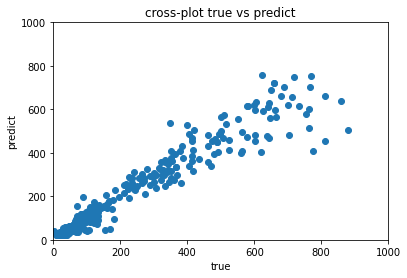

In [22]:
final_dt.loc[final_dt.Well_ID>=5611]
plt.scatter(final_dt.loc[final_dt.Well_ID>=5611].Q_OIS, 
         pd.concat([X_test, pd.Series(y_pred, name='Q_OIS_pred', index=X_test.index)], axis=1).Q_OIS_pred)
plt.ylim(0,1000)
plt.xlim(0,1000)
plt.xlabel('true')
plt.ylabel('predict')
plt.title('cross-plot true vs predict')

### contest_test_df.csv

In [82]:
# final_dt_test.loc[:,:'count'].drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1','Formation_lbl_2'], axis=1).astype('float').shape
# X.Start_date

In [83]:
X.shape
final_test.shape
final_test = final_dt_test.loc[:,:'count']
final_test = final_test.drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1',
                              'Formation_lbl_2'], axis=1).astype('float')

In [84]:
final_test = final_dt_test.loc[:,:'count']
final_test = final_test.drop(['Start_date', 'Date', 'Formation_lbl','Formation_lbl_1',
                              'Formation_lbl_2'], axis=1).astype('float')
xgb.fit(X,y)
y_pred_test = xgb.predict(final_test)
# final_test.shape
# X_train.shape

ValueError: Feature shape mismatch, expected: 91, got 3895

In [39]:
final_predict = pd.concat([final_test.id.astype('int'), pd.Series(y_pred_test, name='Q_OIS')], axis=1)

NameError: name 'y_pred_test' is not defined

### Файл для загрузки

In [ ]:
final_predict
# final_predict.to_csv('final_predict.csv')

# все что Ниже - попытки разобраться в задании

In [721]:
table2.loc[table2.Well_ID==17]


,Well_ID,Start_date,GTM_type_lbl
36292,17,1975-05-31,2
36293,17,1974-10-18,4
36294,17,1978-04-16,7
36295,17,1979-10-17,7


In [723]:
t_and_t2.GTM_type_lbl

32566

In [549]:
def xgb_mape(preds, dtrain):
    labels = dtrain.get_label()
    return('mape', np.mean(np.abs((labels - preds) / (labels+1))))

xgb = XGBRegressor(n_estimators=200, learning_rate=0.01)
xgb.fit(X_train, y_train, 
       eval_set=[(X_train, y_train),(X_test, y_test)], eval_metric='mae')

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Dnytr_1, H_din_1, NomMoschn_1, Hperf_1, NomNapor_1, Water_cut_1, NomPodacha_1, Dnkt_1, H_sp_1, P_plst_1, Hvd_1, Extend_Hvd_1, PlNeft_1, VyazkNeft_1, SumTolshin_1, P_zatr_1, PlVody_1, Pnas_1, Inject_0_1, Inject_1_1, Inject_2_1, Inject_3_1, BHP_1, IDN_type_1, NalichSep_1, Formation_lbl_1, state_age_1, Well_ID_1, VNR_1, Q_OIS_1, Dnytr_2, H_din_2, NomMoschn_2, Hperf_2, NomNapor_2, Water_cut_2, NomPodacha_2, Dnkt_2, H_sp_2, P_plst_2, Hvd_2, Extend_Hvd_2, PlNeft_2, VyazkNeft_2, SumTolshin_2, P_zatr_2, PlVody_2, Pnas_2, Inject_0_2, Inject_1_2, Inject_2_2, Inject_3_2, BHP_2, IDN_type_2, NalichSep_2, Formation_lbl_2, state_age_2, Well_ID_2, VNR_2, Q_OIS_2, count, id, Dnytr, H_din, NomMoschn, Hperf, NomNapor, Water_cut, NomPodacha, Dnkt, H_sp, P_plst, Hvd, Extend_Hvd, PlNeft, VyazkNeft, SumTolshin, P_zatr, PlVody, Pnas, Inject_0, Inject_1, Inject_2, Inject_3, BHP, State, IDN_type, NalichSep, Formation_lbl, state_age, Date, Start_date, Well_ID, VNR

In [514]:
int(round(3/2,0))
2%2
np.append(merged2.loc[merged2.id==84].iloc[0:14//2].mean(axis=0).values, 
           merged2.loc[merged2.id==84].iloc[14//2:14].mean(axis=0).values)
delet = ['id', 'count', 'State']
a = np.mean(merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1))#.mean()
b = np.mean(merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1))
c = merged2.loc[merged2.id==84].iloc[14]
# pd.concat([a.values,b.values])
a.index = [sub + append_str_2 for sub in a.index]
b.index = [sub + append_str_1 for sub in b.index]


#добавим префикс к именам
append_str_2 = '_2'
append_str_1 = '_1'
  
# Добавить суффикс / префикс к строкам в списке
columns_2 = merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1).columns
pre_res_2 = [sub + append_str_2 for sub in columns_2]

columns_1 = merged2.loc[merged2.id==84].iloc[0:14//2].drop(delet, axis=1).columns
pre_res_1 = [sub + append_str_1 for sub in columns_1]
pre_res_1
# merged2.columns.values
# [pre_res_2 + pre_res_1 +[merged2.columns.values]]
hey = pd.DataFrame(pd.concat([a,b,c])).T
hey = hey.append(hey, ignore_index=True)
hey

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3370: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\numpy\core\from

,Dnytr_2,H_din_2,Q_OIS_2,NomMoschn_2,Hperf_2,NomNapor_2,Water_cut_2,NomPodacha_2,Dnkt_2,H_sp_2,P_plst_2,Hvd_2,Extend_Hvd_2,PlNeft_2,VyazkNeft_2,SumTolshin_2,P_zatr_2,PlVody_2,Pnas_2,Inject_0_2,Inject_1_2,Inject_2_2,Inject_3_2,BHP_2,IDN_type_2,NalichSep_2,Formation_lbl_2,state_age_2,Well_ID_2,VNR_2,Dnytr_1,H_din_1,Q_OIS_1,NomMoschn_1,Hperf_1,NomNapor_1,Water_cut_1,NomPodacha_1,Dnkt_1,H_sp_1,P_plst_1,Hvd_1,Extend_Hvd_1,PlNeft_1,VyazkNeft_1,SumTolshin_1,P_zatr_1,PlVody_1,Pnas_1,Inject_0_1,Inject_1_1,Inject_2_1,Inject_3_1,BHP_1,IDN_type_1,NalichSep_1,Formation_lbl_1,state_age_1,Well_ID_1,VNR_1,count,id,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,VNR
0,129,2751.29,57.7143,90,16,2414,84.5714,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,12.8286,1.011,115.7,304.034,59.0651,115.958,192.599,56.0629,0,1,6.92641e+12,501,17,0,129,2751.29,57.7143,90,16,2414,84.5714,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,12.8286,1.011,115.7,304.034,59.0651,115.958,192.599,56.0629,0,1,6.92641e+12,501,17,0,14,84,129,1692.5,58,90,16,2414,85,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,11.9,1.011,115.7,134.47,42.4516,54.7742,36.9032,63.35,1,0,1,48,501,1979-11-06,1979-10-17,17,1
1,129,2751.29,57.7143,90,16,2414,84.5714,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,12.8286,1.011,115.7,304.034,59.0651,115.958,192.599,56.0629,0,1,6.92641e+12,501,17,0,129,2751.29,57.7143,90,16,2414,84.5714,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,12.8286,1.011,115.7,304.034,59.0651,115.958,192.599,56.0629,0,1,6.92641e+12,501,17,0,14,84,129,1692.5,58,90,16,2414,85,100,66.73,3082,340,3278,291.259,0.856,1.83,14.4,11.9,1.011,115.7,134.47,42.4516,54.7742,36.9032,63.35,1,0,1,48,501,1979-11-06,1979-10-17,17,1


In [397]:
merged2.set_index('id').iloc[84]

count                             38
Dnytr                            129
H_din                           2389
Q_OIS                             49
NomMoschn                         56
Hperf                             17
NomNapor                        2496
Water_cut                         75
NomPodacha                        80
Dnkt                              76
H_sp                            3023
P_plst                           284
Hvd                           3117.6
Extend_Hvd                   136.284
PlNeft                         0.856
VyazkNeft                       1.83
SumTolshin                      11.2
P_zatr                             9
PlVody                         0.978
Pnas                             116
Inject_0                     259.453
Inject_1                     72.2903
Inject_2                     67.4516
Inject_3                     58.4516
BHP                          68.5806
State                              1
IDN_type                           0
N

In [172]:
sample = table.loc[(table.id==22)]
table.loc[(table.id==5695)]
# sample.resample('3D', on='Date').sum()
# sample.head(40)
# start = sample.loc[0, 'Date']
# end = sample.loc[sample.shape[0]-1, 'Date']
# idx = pd.date_range(start, end, periods=5)
# pd.Series(sample.loc[:,'Date'], index=idx)
# sample

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
951,130.6,2498.0,330.0,220.0,14.0,2012.0,53.0,400.0,73.000000,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,34.7,1.01,82.4,708.366667,550.733333,963.700000,795.000000,55.500000,1,0,1.0,42,58.0,1978-11-24,1979-02-01,1025,5695,0
952,130.6,2495.0,0.0,220.0,14.0,2012.0,53.0,400.0,73.000000,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,33.6,1.01,82.4,708.366667,550.733333,963.700000,795.000000,54.470000,0,0,1.0,42,58.0,1978-11-25,1979-02-01,1025,5695,0
953,130.6,2411.0,327.0,220.0,14.0,2038.0,50.0,404.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,33.9,1.01,82.4,708.366667,550.733333,963.700000,795.000000,59.650000,1,0,1.0,42,58.0,1978-12-04,1979-02-01,1025,5695,0
954,130.6,2466.0,328.0,220.0,14.0,2038.0,50.0,404.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,34.0,1.01,82.4,708.366667,550.733333,963.700000,795.000000,56.450000,1,0,1.0,42,58.0,1978-12-05,1979-02-01,1025,5695,0
955,130.6,2502.0,320.0,220.0,14.0,2038.0,50.0,404.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,34.0,1.01,82.4,708.366667,550.733333,963.700000,795.000000,54.360000,1,0,1.0,42,58.0,1978-12-07,1979-02-01,1025,5695,0
956,130.6,2489.0,306.0,220.0,14.0,2038.0,54.0,404.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,34.2,1.01,82.4,633.290323,548.516129,971.677419,794.838710,57.568771,1,0,1.0,42,58.0,1978-12-22,1979-02-01,1025,5695,0
957,130.6,2490.0,304.0,220.0,14.0,2038.0,54.0,404.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,34.2,1.01,82.4,633.290323,548.516129,971.677419,794.838710,57.484623,1,0,1.0,42,58.0,1978-12-29,1979-02-01,1025,5695,0
958,130.6,2505.0,303.0,75.0,14.0,2116.0,55.0,400.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,32.1,1.01,82.4,633.290323,548.516129,971.677419,794.838710,52.560000,1,0,1.0,42,58.0,1979-01-06,1979-02-01,1025,5695,0
959,130.6,2505.0,300.0,75.0,14.0,2116.0,55.0,400.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,32.1,1.01,82.4,738.709677,504.096774,885.645161,724.580645,50.343686,1,0,1.0,42,58.0,1979-01-15,1979-02-01,1025,5695,0
960,130.6,2514.0,301.0,75.0,14.0,2116.0,55.0,400.0,75.202281,2630.0,150.0,2795.0,318.345,0.866,1.85,9.2,32.6,1.01,82.4,738.709677,504.096774,885.645161,724.580645,54.862081,1,0,1.0,42,58.0,1979-01-22,1979-02-01,1025,5695,0


In [226]:
# посчитаем максимальный дебит для скважин
# сначала сгруппируем макс дебит для скважин

# side-by-side bar plot of the DataFrame directly above
# table.groupby('Well_ID').Q_OIS.max().plot(kind='bar')
test.loc[test.VNR==1].nunique()#.Well_ID
test.loc[test.VNR==1].sort_values(by='Well_ID', ascending=False)
# plt.figure(figsize=(50,50))
# plt.hist(test.loc[test.VNR==1].loc[:,'Start_date'], bins=500)

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
282759,132.0,NaN,NaN,32.0,NaN,1704.0,80.0,50.0,73.000000,1840.0,248.0,2848.35,416.304150,0.849,1.10,1.80,NaN,1.008,130.0,229.200000,NaN,NaN,131.586207,96.69,1,0,1.0,38,126.0,1980-05-12,1980-05-04,8693,60111,1
396839,129.0,2637.0,NaN,45.0,12.0,2337.0,64.0,45.0,73.000000,2860.0,180.0,3060.00,658.420000,0.849,1.10,4.80,11.40,1.008,130.0,NaN,NaN,NaN,172.419355,41.31,1,0,1.0,38,256.0,1980-08-02,1980-07-28,8685,60052,1
578792,130.6,1918.0,NaN,45.0,21.0,1945.0,46.0,80.0,73.964621,2770.0,148.0,3038.00,646.936000,0.849,1.10,11.20,10.00,1.008,130.0,334.741935,275.576471,55.419355,113.280000,83.30,1,0,1.0,38,379.0,1980-12-27,1980-12-17,8670,59952,1
526672,129.0,NaN,NaN,46.6,12.0,2086.0,34.0,70.0,73.000000,2380.0,204.0,2544.00,117.156000,0.849,1.10,8.00,NaN,1.008,130.0,713.592233,102.548387,NaN,229.645161,38.18,1,0,0.0,38,1702.0,1980-11-10,1980-10-31,8669,59947,1
565906,129.0,1573.0,NaN,56.0,8.0,2387.0,53.0,80.0,66.125681,2550.0,167.0,2729.00,306.668500,0.849,1.10,8.60,11.30,1.008,130.0,217.064516,152.032258,289.064516,146.096774,90.01,1,0,1.0,38,279.0,1980-12-15,1980-12-04,8668,59941,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160498,159.6,1700.0,NaN,140.0,NaN,2311.0,15.0,250.0,73.000000,2360.0,295.0,3475.50,467.880250,0.856,1.83,8.00,16.00,1.011,115.7,27.774194,62.225806,109.548387,NaN,110.19,1,1,1.0,48,61.0,1980-02-11,1980-02-04,6,24,1
555490,159.6,2423.0,NaN,80.0,NaN,2793.0,35.0,80.0,65.513934,3050.0,295.0,3626.20,680.741500,0.856,1.83,4.88,5.60,1.011,115.7,54.366667,91.166667,12.400000,47.833333,53.18,1,0,1.0,48,190.0,1980-12-05,1980-11-30,5,23,1
294472,159.6,2100.0,NaN,63.0,NaN,2660.0,42.0,80.0,76.669508,3050.0,295.0,3626.20,680.741500,0.856,1.83,4.88,17.15,1.011,115.7,63.225806,114.000000,24.870968,75.677419,74.32,1,0,1.0,48,184.0,1980-05-20,1980-05-12,5,22,1
511575,222.9,NaN,NaN,552.0,NaN,1710.0,94.0,1167.0,114.000000,2100.0,136.0,2980.00,533.481818,0.876,2.91,3.90,NaN,1.012,94.0,69.903226,45.709677,57.000000,50.451613,68.14,1,0,1.0,25,2317.0,1980-10-28,1980-10-13,2,8,1


,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
149994,157.2,1588.0,367.0,30.0,23.0,1850.0,65.0,370.0,73.00,2481.0,248.00000,2596.0,173.0000,0.866000,1.36000,25.4,23.1,1.015000,109.00,934.580645,908.580645,698.000000,783.064516,84.259029,1,1,0.0,3,357.0,1969-08-05,1969-11-19,5522,38157,0
150137,127.0,1909.0,442.0,180.0,32.0,2000.0,80.0,400.0,73.00,2687.0,243.00000,2851.0,446.2000,0.866000,1.36000,23.6,29.3,1.015000,109.00,934.580645,952.806452,908.580645,637.870968,97.200159,1,1,0.0,3,206.0,1969-08-06,1969-12-10,5511,38099,0
150814,127.0,1909.0,442.0,180.0,32.0,2000.0,80.0,400.0,73.00,2687.0,243.00000,2851.0,446.2000,0.866000,1.36000,23.6,29.3,1.015000,109.00,934.580645,952.806452,908.580645,637.870968,97.200159,1,1,0.0,3,206.0,1969-08-11,1969-12-10,5511,38099,0
152437,127.0,1033.0,458.0,180.0,32.0,2000.0,80.0,400.0,73.00,2687.0,243.00000,2851.0,446.2000,0.866000,1.36000,23.6,0.6,1.015000,109.00,792.483871,798.709677,817.064516,593.387097,133.844768,1,1,0.0,3,206.0,1969-08-22,1969-12-10,5511,38099,0
152554,157.2,1488.0,396.0,30.0,23.0,1850.0,55.0,370.0,73.00,2481.0,248.00000,2596.0,173.0000,0.866000,1.36000,25.4,22.3,1.015000,109.00,792.483871,817.064516,778.935484,698.290323,88.650910,1,1,0.0,3,357.0,1969-08-23,1969-11-19,5522,38157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782400,127.0,1893.0,287.0,70.0,46.0,2010.0,91.0,160.0,73.00,2004.0,272.00000,2960.0,288.9000,0.852000,1.10000,40.4,11.2,1.005000,98.80,56.064516,505.387097,197.516129,290.483871,105.310000,1,1,1.0,18,608.0,1980-01-01,1979-12-23,3302,22016,1
2782403,129.0,2038.0,80.0,140.0,34.0,2428.0,80.0,200.0,73.64,2550.0,276.00000,2718.0,17.2900,0.852000,1.10000,23.0,16.0,1.005000,98.80,386.225806,348.645161,182.064516,347.741935,69.310000,1,0,0.0,18,1185.0,1980-01-01,1979-12-21,2865,19380,1
2782406,129.0,2258.0,45.0,45.0,17.0,2589.0,7.0,50.0,73.00,2619.0,253.00000,2735.0,97.5125,0.873000,1.58000,14.6,24.0,1.007000,107.00,83.580645,42.806452,184.387097,87.032258,57.260000,1,0,1.0,2,407.0,1980-01-02,1979-12-25,4552,30939,1
2782437,129.0,2500.0,30.0,40.0,51.0,2190.0,9.0,50.0,73.00,2652.0,252.04928,2826.0,158.0900,0.869875,1.50125,29.0,22.0,1.008138,114.75,67.322581,110.419355,199.354839,125.129032,46.130000,1,0,1.0,"3,5",625.0,1980-01-04,1979-12-28,6200,42565,1


In [120]:
'''
уникальных значений Well_Id = 7288

-надо оставить для одной скважины, то есть с одним well_id, только vnr==1, т.к. дата выхода на режим может быть одна, 
-но может быть и не одна, то есть проводили несколько ИДН и после каждой она выходила на режим и имела определенный дебит.
Имеется ввиду убрать для начала строчки где даты меньше start_date и внр 1, т.к. там дебит не нужен 
-посчитаем граничное значение дебита для каждой скважины, при котором происходит выход на режим 
-СУТЬ ТАКАЯ ЧТО ДЛЯ КАЖДОГО ВЫХОДА НА РЕЖИМ У СКВ НАДО ДОБАВЛЯТЬ ЕГО ДАННЫЕ В ТАБЛИЦУ В КАЧЕСТВЕ ПРИЗНАКОВ
ПОКА ДАТА < START_DATE, КОГДА СТАРТ ДЕЙТ ПОМЕНЯЛСЯ НУЖНО ДОБАВЛЯТЬ ЕГО В НОВУЮ СТРОКУ АГГРЕГИРУЯ ОПЯТЬ ВСЕ ПРИЗНАКИ В ТАБЛИЦУ
'''

'\nуникальных значений Well_Id = 7288\n\n-надо оставить для одной скважины, то есть с одним well_id, только vnr==1, т.к. дата выхода на режим может быть одна, \n-но может быть и не одна, то есть проводили несколько ИДН и после каждой она выходила на режим и имела определенный дебит.\nИмеется ввиду убрать для начала строчки где даты меньше start_date и внр 1, т.к. там дебит не нужен \n-посчитаем граничное значение дебита для каждой скважины, при котором происходит выход на режим \n'

In [91]:
# table.dropna(axis=0).resample('D', on='Start_date').sum()#.tail(15)
# # table#.Start_date
# # table.dropna(axis=0).nunique()
gp = table.dropna(axis=0).groupby(['Well_ID','VNR', pd.Grouper(key='Start_date', freq='D')]).Q_OIS.mean()#.iloc[1]
gp2 = table.dropna(axis=0).groupby(['Well_ID','VNR', pd.Grouper(key='Date', freq='3D')]).Q_OIS.mean()
table.dropna(axis=0)['Well_ID']#.map(gp)
pd.merge(table.dropna(axis=0), gp, on=['Well_ID', 'Start_date'], how='left').loc[pd.merge(table.dropna(axis=0), gp, on=['Well_ID', 'Start_date'], how='left').Well_ID==5511]
gp2[17][0]#.index# table.dropna(axis=0).loc[table.Well_ID==17]
# table.groupby(['Well_ID','VNR', pd.Grouper(key='Start_date', freq='D')]).agg(unique_items=('item_code', 'nunique'),
#          total_quantity=('quantity','sum'),
#          total_amount=('price','sum'))

Date
1979-06-23    60.0
1979-07-02    60.0
1979-07-08    60.0
1979-07-14    60.0
1979-08-16    60.0
1979-08-22    52.0
1979-08-28    52.0
1979-09-06    50.0
1979-09-09    49.0
1979-09-18    49.0
1979-09-24    49.0
1979-09-30    49.0
1979-10-06    49.0
1979-10-12    25.0
Name: Q_OIS, dtype: float64

In [263]:
table.loc[(table.Well_ID==18)].tail(15)

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,difference
146,129.0,1728.0,45.0,56.0,17.0,2525.0,73.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,113.161290,60.645161,72.354839,74.129032,108.123673,1,0,1.0,48,96.0,1978-12-22,1979-02-26,18,91,0,-5702400000000000
147,129.0,1728.0,42.0,56.0,17.0,2525.0,73.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,113.161290,60.645161,72.354839,74.129032,107.928044,1,0,1.0,48,96.0,1978-12-29,1979-02-26,18,91,0,-5097600000000000
148,129.0,1728.0,40.0,45.0,17.0,2555.0,75.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,113.161290,60.645161,72.354839,74.129032,116.160000,1,0,1.0,48,96.0,1979-01-05,1979-02-26,18,91,0,-4492800000000000
149,129.0,1728.0,42.0,45.0,17.0,2555.0,75.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,108.942028,1,0,1.0,48,96.0,1979-01-15,1979-02-26,18,91,0,-3628800000000000
150,129.0,1728.0,42.0,45.0,17.0,2555.0,74.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,109.329385,1,0,1.0,48,96.0,1979-01-22,1979-02-26,18,91,0,-3024000000000000
151,129.0,1728.0,42.0,45.0,17.0,2555.0,70.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,108.728812,1,0,1.0,48,96.0,1979-01-29,1979-02-26,18,91,0,-2419200000000000
152,129.0,1050.0,30.0,45.0,17.0,2555.0,74.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,162.520000,1,0,1.0,48,96.0,1979-02-01,1979-02-26,18,91,0,-2160000000000000
153,129.0,1728.0,41.0,45.0,17.0,2555.0,74.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,116.100000,1,0,1.0,48,96.0,1979-02-05,1979-02-26,18,91,0,-1814400000000000
154,129.0,1728.0,41.0,45.0,17.0,2555.0,74.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,109.588914,1,0,1.0,48,96.0,1979-02-09,1979-02-26,18,91,0,-1468800000000000
155,129.0,1728.0,41.0,45.0,17.0,2555.0,74.0,50.0,71.742725,3024.0,284.0,3119.0,136.2875,0.856,1.83,11.2,8.00,1.011,115.7,261.322581,88.451613,102.193548,89.838710,109.588914,1,0,1.0,48,96.0,1979-02-14,1979-02-26,18,91,0,-1036800000000000


In [265]:
table.dropna(axis=0).loc[table.Start_date=='1969-08-14']

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,difference
23813,130.6,2031.0,259.0,180.0,77.0,2050.0,47.0,240.0,73.0,2371.0,239.0,2484.0,88.0,0.865941,1.52,48.8,14.6,1.015,104.56,616.741935,719.096774,329.322581,404.258065,38.133389,1,1,0.0,"2,3,5",369.0,1969-08-26,1969-08-14,5734,39472,1,1036800000000000


In [141]:
test.loc[test.VNR==1]
table.loc[table.Well_ID==5511].loc[:,['Date', 'Start_date']].dropna(axis=0)
table.dropna(axis=0).loc[table.Well_ID==5511]

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR
150137,127.0,1909.0,442.0,180.0,32.0,2000.0,80.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,29.3,1.015,109.0,934.580645,952.806452,908.580645,637.870968,97.200159,1,1,0.0,3,206.0,1969-08-06,1969-12-10,5511,38099,0
150814,127.0,1909.0,442.0,180.0,32.0,2000.0,80.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,29.3,1.015,109.0,934.580645,952.806452,908.580645,637.870968,97.200159,1,1,0.0,3,206.0,1969-08-11,1969-12-10,5511,38099,0
152437,127.0,1033.0,458.0,180.0,32.0,2000.0,80.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.6,1.015,109.0,792.483871,798.709677,817.064516,593.387097,133.844768,1,1,0.0,3,206.0,1969-08-22,1969-12-10,5511,38099,0
155067,127.0,1013.0,463.0,180.0,32.0,2000.0,81.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.1,1.015,109.0,792.483871,798.709677,817.064516,593.387097,134.432201,1,1,0.0,3,206.0,1969-09-09,1969-12-10,5511,38099,0
156251,127.0,1009.0,464.0,180.0,32.0,2000.0,81.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.1,1.015,109.0,785.466667,815.133333,915.866667,472.100000,134.647207,1,1,0.0,3,206.0,1969-09-17,1969-12-10,5511,38099,0
158792,127.0,1040.0,439.0,180.0,32.0,2000.0,83.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.2,1.015,109.0,785.466667,815.133333,915.866667,472.100000,146.116789,1,1,0.0,3,206.0,1969-10-06,1969-12-10,5511,38099,0
162496,127.0,945.0,449.0,180.0,32.0,2000.0,82.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.1,1.015,109.0,766.258065,910.225806,841.774194,1176.161290,150.949308,1,1,0.0,3,206.0,1969-11-05,1969-12-10,5511,38099,0
163693,127.0,935.0,453.0,180.0,32.0,2000.0,82.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.2,1.015,109.0,739.800000,1121.466667,851.966667,913.100000,150.534855,1,1,0.0,3,206.0,1969-11-15,1969-12-10,5511,38099,0
164091,127.0,928.0,451.0,180.0,32.0,2000.0,82.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.0,1.015,109.0,739.800000,1121.466667,851.966667,913.100000,150.949308,1,1,0.0,3,206.0,1969-11-18,1969-12-10,5511,38099,0
164194,127.0,951.0,470.0,180.0,32.0,2000.0,82.0,400.0,73.0,2687.0,243.0,2851.0,446.2,0.866,1.36,23.6,0.0,1.015,109.0,739.800000,1121.466667,851.966667,913.100000,153.301249,1,1,0.0,3,206.0,1969-11-19,1969-12-10,5511,38099,0


In [246]:
# Проверим, будет ли после проведения ИДН VNR всегда равняться 1, или же возможно, что после ГТМ 
#скважина может не выйти на режим

table['difference'] = table.Date - table.Start_date
table['difference'] = table.difference.dropna(axis=0).astype('int64')
table[(table.VNR==1)&(table.difference>0)]
# table.loc[table.VNR==0].Q_OIS.value_counts()
# table.Date.dropna(axis=0)#.dt.hour
# table.differecne.dropna(axis=0).astype('int64')

,Dnytr,H_din,Q_OIS,NomMoschn,Hperf,NomNapor,Water_cut,NomPodacha,Dnkt,H_sp,P_plst,Hvd,Extend_Hvd,PlNeft,VyazkNeft,SumTolshin,P_zatr,PlVody,Pnas,Inject_0,Inject_1,Inject_2,Inject_3,BHP,State,IDN_type,NalichSep,Formation_lbl,state_age,Date,Start_date,Well_ID,id,VNR,difference
14,129.0,1692.5,58.0,90.0,16.0,2414.0,85.0,100.0,66.729958,3082.0,340.0,3278.0,291.25900,0.856,1.83,14.4,11.90,1.011,115.7,134.469854,42.451613,54.774194,36.903226,63.35,1,0,1.0,48,501.0,1979-11-06,1979-10-17,17,84,1,1728000000000000
48,129.0,2310.0,81.0,63.0,17.0,2696.0,40.0,79.0,75.700000,3023.0,284.0,3117.6,136.29000,0.856,1.83,11.2,11.00,1.008,116.0,145.032258,87.000000,159.258065,93.354839,68.69,1,0,0.0,48,663.0,1976-08-28,1976-08-18,18,88,1,864000000000000
87,129.0,2070.5,63.0,56.0,17.0,2496.0,60.0,80.0,76.000000,3024.0,284.0,3117.6,136.28400,0.856,1.83,11.2,9.00,0.978,116.0,259.452632,72.290323,67.451613,58.451613,41.25,1,0,0.0,48,369.0,1977-09-12,1977-09-02,18,89,1,864000000000000
129,129.0,2402.0,58.0,63.0,17.0,2674.0,60.0,80.0,75.700000,3024.0,284.0,3117.6,136.28400,0.856,1.83,11.2,3.00,1.011,116.0,14.129032,119.967742,127.000000,56.580645,53.81,1,0,0.0,48,204.0,1978-04-14,1978-04-05,18,90,1,777600000000000
160,129.0,1500.0,72.0,45.0,17.0,2555.0,93.0,50.0,71.742725,3024.0,284.0,3119.0,136.28750,0.856,1.83,11.2,6.25,1.011,115.7,204.032258,52.032258,81.909224,58.935484,98.85,1,0,1.0,48,96.0,1979-03-25,1979-02-26,18,91,1,2332800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,132.0,1816.0,47.0,45.0,7.0,2176.0,66.0,34.0,75.400000,2360.0,145.0,2448.0,108.94000,0.849,1.29,7.0,0.00,1.000,110.0,351.311392,324.032258,337.397468,394.580645,119.61,1,1,1.0,36,216.0,1979-10-30,1979-10-19,8648,59789,1,950400000000000
32532,127.0,1875.0,32.0,32.0,23.3,1750.0,66.0,30.0,64.100000,2210.0,236.0,2433.7,253.69285,0.885,1.30,23.4,18.00,1.000,80.0,286.161290,412.096774,424.774194,652.419355,62.31,1,0,0.0,2,422.0,1977-11-06,1977-10-27,8649,59795,1,864000000000000
32533,152.0,2202.0,48.0,45.0,377.1,2060.0,71.0,50.0,73.000000,2260.0,184.0,2730.5,485.24000,0.885,1.30,427.3,10.00,1.000,80.0,311.069252,628.766667,427.833333,340.400000,54.99,1,0,0.0,2,681.0,1974-12-09,1974-11-26,8651,59823,1,1123200000000000
32548,129.0,2321.0,39.0,45.0,14.0,2262.0,45.0,35.0,68.403571,2800.0,188.0,2899.0,496.75100,0.849,1.10,4.8,10.00,1.008,130.0,306.709677,251.870968,168.580645,218.225806,46.20,1,0,1.0,38,191.0,1979-12-31,1979-12-21,8671,59956,1,864000000000000


In [72]:
table2

,Well_ID,Date_VNR,Start_date,GTM_type_lbl,ranked,VNR_count
0,7532,1977-08-30,1977-08-09,0,5.5,1
1,7532,1980-09-26,1980-08-25,0,5.5,1
2,7532,1975-03-13,1975-02-15,4,4.0,1
3,7532,1976-01-11,1975-12-31,6,2.5,1
4,7532,1978-11-02,1978-10-20,6,2.5,1
...,...,...,...,...,...,...
36299,18,1981-06-07,1981-05-24,8,1.0,1
36300,18,1976-08-28,1976-08-18,7,3.5,1
36301,18,1977-09-12,1977-09-02,7,3.5,1
36302,18,1978-04-14,1978-04-05,7,3.5,1


In [96]:
# Создадим новый признак показывающтий сколько раз одна скважина выходила на режим 

table2['VNR_count'] = 1
table2
table2.groupby(['Well_ID', 'Date_VNR']).VNR_count.sum()
# print(table2.groupby('Well_ID')['VNR_count'].transform('sum'))

gp = table2.groupby('Well_ID').VNR_count.sum()
table2['gp_feature'] = table2['Well_ID'].map(gp)

# Запишем пограничное значение дебита для каждой из скважин при котором происходит выход на режим

table.groupby(['Well_ID', 'VNR']).min().loc[:,:]#.loc[1,:]

Dnytr   H_din   Q_OIS  NomMoschn   Hperf  NomNapor  Water_cut  \
Well_ID VNR                                                                  
0       0    223.0  1753.0     0.0      552.0  548.00    1710.0       83.0   
        1    223.0  1754.0  1104.0      552.0  548.00    1710.0       87.0   
1       0    130.6     NaN     0.0      238.6   12.40    1680.0       66.0   
        1    130.6     NaN   304.0      238.6   12.40    1680.0       71.0   
2       0    222.9     NaN     0.0      552.0  553.00    1710.0       78.0   
...            ...     ...     ...        ...     ...       ...        ...   
8691    1    130.6  1485.0    59.0       28.0   10.00    1352.0       83.0   
8692    0    129.0  1462.0     0.0       32.0   10.00    1696.0       60.0   
        1    129.0  2342.0    43.0       32.0   10.00    1696.0       70.0   
8693    0    132.0     NaN     0.0       70.0    3.25    1716.0       74.0   
        1    132.0     NaN    59.0       70.0    3.25    1716.0       70.0   

             NomPodacha    Dnkt    H_sp  P_plst      Hvd  Extend_Hvd  PlNeft  \
Well_ID VNR                                                                    
0       0        1167.0  114.00  1913.0   162.0  2616.00   161.90000   0.873   
        1        1167.0  114.00  1919.0   162.0  2616.00   161.90000   0.876   
1       0         398.0   73.00  2353.0   154.0  2444.00     4.60000   0.873   
        1         398.0   73.00  2353.0   154.0  2444.00     4.60000   0.876   
2       0        1167.0  114.00  2100.0   168.0  2980.00   533.44000   0.876   
...                 ...     ...     ...     ...      ...         ...     ...   
8691    1          25.0   64.48  1950.0   207.0  2712.00   309.90000   0.849   
8692    0          30.0   73.00  2500.0   163.0  2712.00   314.67600   0.849   
        1          30.0   73.00  2590.0   163.0  2712.00   314.67600   0.849   
8693    0         125.0   73.00  1840.0   268.0  2848.35   416.30415   0.849   
        1         125.0   73.00  1840.0   295.0  2848.35   416.30415   0.849   

             VyazkNeft  SumTolshin  P_zatr  PlVody   Pnas   Inject_0  \
Well_ID VNR                                                            
0       0         2.91        13.6    26.0   1.012   98.6        NaN   
        1         2.91        13.6    28.0   1.012   98.6        NaN   
1       0         2.91         7.4     NaN   1.012   94.0        NaN   
        1         2.91         7.4     NaN   1.012   94.0        NaN   
2       0         2.91       500.6     NaN   1.012   94.0        NaN   
...                ...         ...     ...     ...    ...        ...   
8691    1         0.98         7.2    10.0   1.008  130.0        NaN   
8692    0         0.98         7.6     3.2   1.008  130.0        NaN   
        1         0.98         7.6    16.0   1.008  130.0        NaN   
8693    0         0.98         1.8     NaN   1.008  130.0  173.16129   
        1         0.98         1.8     NaN   1.008  130.0  190.40000   

               Inject_1    Inject_2    Inject_3        BHP  State  IDN_type  \
Well_ID VNR                                                                   
0       0           NaN         NaN         NaN  98.820447      0         0   
        1           NaN         NaN         NaN        NaN      1         0   
1       0           NaN         NaN         NaN  45.270000      0         0   
        1           NaN         NaN         NaN  41.090000      1         0   
2       0           NaN         NaN         NaN  84.660000      0         0   
...                 ...         ...         ...        ...    ...       ...   
8691    1    351.225806  269.838710         NaN  93.830000      1         0   
8692    0     95.483871  214.733333  335.178571  41.660000      0         1   
        1     98.366667  287.066667  400.666667  44.620000      1         1   
8693    0           NaN  108.322581   71.000000  85.700000      0         1   
        1           NaN  136.766667  264.733333  89.800000      1       

In [89]:
table2.head(15)

,Well_ID,Date_VNR,Start_date,GTM_type_lbl,ranked,VNR_count,gp_feature
0,7532,1977-08-30,1977-08-09,0,5.5,1,6
1,7532,1980-09-26,1980-08-25,0,5.5,1,6
2,7532,1975-03-13,1975-02-15,4,4.0,1,6
3,7532,1976-01-11,1975-12-31,6,2.5,1,6
4,7532,1978-11-02,1978-10-20,6,2.5,1,6
5,7532,1977-01-13,1977-01-04,7,1.0,1,6
6,7533,1976-03-08,1976-02-17,0,5.5,1,6
7,7533,1979-05-28,1979-04-18,0,5.5,1,6
8,7533,1975-03-28,1975-03-03,4,4.0,1,6
9,7533,1978-05-22,1978-05-12,6,2.5,1,6


In [44]:

# pd.to_datetime(table.dropna(axis=0).Start_date)

# table.dropna(axis=0).loc[:,table.Well_ID==3059, table.VNR==1]#.dropna(axis=0)
# # table.loc[table.Well_ID==7532,'Start_date'].unique()#.dropna(axis=0).head(3)

table[(table.Well_ID == 3059) & (table.VNR == 1)].Date - table[(table.Well_ID == 3059) & (table.VNR == 1)].Start_date

1552758   12 days
1860461    8 days
2566457    8 days
dtype: timedelta64[ns]

In [129]:
table.dropna(axis=0).loc[table.Well_ID==7532].loc[:,['Date','Start_date']]

,Date,Start_date
1766391,1977-01-13,1977-01-04


In [126]:
# Добавим каждой скважине свой Date_VNR

table_final = pd.concat([table, table2.loc[:,['Well_ID','Date_VNR', 'GTM_type_lbl']]], axis=1)
# table2.loc[:,['Well_ID','Date_VNR', 'GTM_type_lbl']]
# len(table.Well_ID.value_counts())
table_final
table2

,Well_ID,Date_VNR,Start_date,GTM_type_lbl
0,7532,1977-08-30,1977-08-09,0
1,7532,1980-09-26,1980-08-25,0
2,7532,1975-03-13,1975-02-15,4
3,7532,1976-01-11,1975-12-31,6
4,7532,1978-11-02,1978-10-20,6
...,...,...,...,...
36299,18,1981-06-07,1981-05-24,8
36300,18,1976-08-28,1976-08-18,7
36301,18,1977-09-12,1977-09-02,7
36302,18,1978-04-14,1978-04-05,7


In [124]:
example

,id,Q_OIS
0,6,0
1,8,0
2,22,0
3,23,0
4,24,0
...,...,...
3890,59941,0
3891,59947,0
3892,59952,0
3893,60052,0


(array([3.892e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

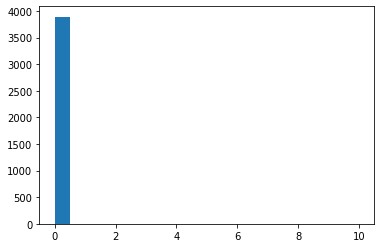

In [45]:
plt.hist(example.iloc[:,1], bins=20)
# example.describe()

In [68]:
example

,id,Q_OIS
0,6,0
1,8,0
2,22,0
3,23,0
4,24,0
...,...,...
3890,59941,0
3891,59947,0
3892,59952,0
3893,60052,0


In [28]:
example.iloc[:,1]

0       0
1       0
2       0
3       0
4       0
       ..
3890    0
3891    0
3892    0
3893    0
3894    0
Name: Q_OIS, Length: 3895, dtype: int64